In [1]:
# 使用渥太华数据集进行数据处理和分析
# 需要进行时域、频域、时频域分析
import os
import numba
import numpy as np
from scipy.io import loadmat
from scipy.stats import kurtosis, skew
from scipy.fft import fft
import matplotlib.pyplot as plt
from scipy import signal
from scipy.signal import periodogram
from scipy.signal import lfilter
from Home1 import *


In [2]:
# 读取数据
HA1=loadmat(r'1-a healthy bearing\H-A-1.mat')
IA1=loadmat(r'2-a bearing with inner race fault\I-A-1.mat')
OA1=loadmat(r'3-a bearing with outer race fault\O-A-1.mat')
BA1=loadmat(r'4-a bearing with ball fault\B-A-1.mat')

In [3]:
# 分别读取两个通道的数值 ch1表示振动信号，ch2表示转速信号
# 采样频率为200KHz，采样时间为10s，分析振幅信号
ch_ha1=HA1['Channel_1']
ch_ia1=IA1['Channel_1']
ch_oa1=OA1['Channel_1']
ch_ba1=BA1['Channel_1']
ch=[ch_ha1,ch_ia1,ch_oa1,ch_ba1]
ch=[ch_ha1[::2500],ch_ia1[::2500],ch_oa1[::2500],ch_ba1[::2500]]

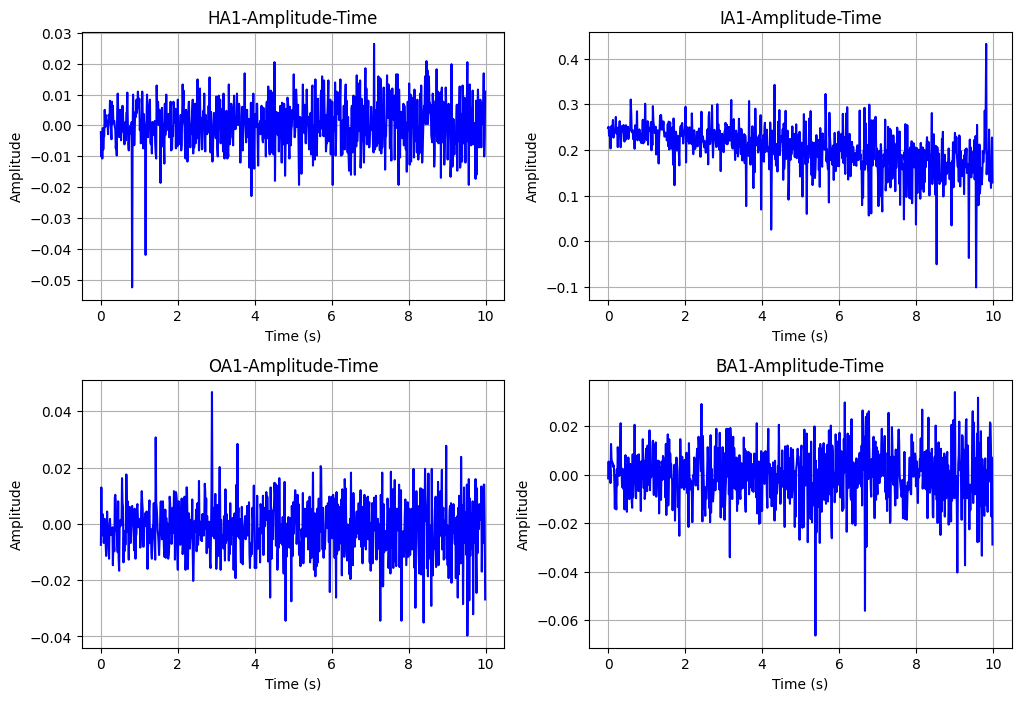

In [4]:
# 绘制原始图像,分别是健康、内圈故障、外圈故障、球故障
draw_four_pic(ch=ch)

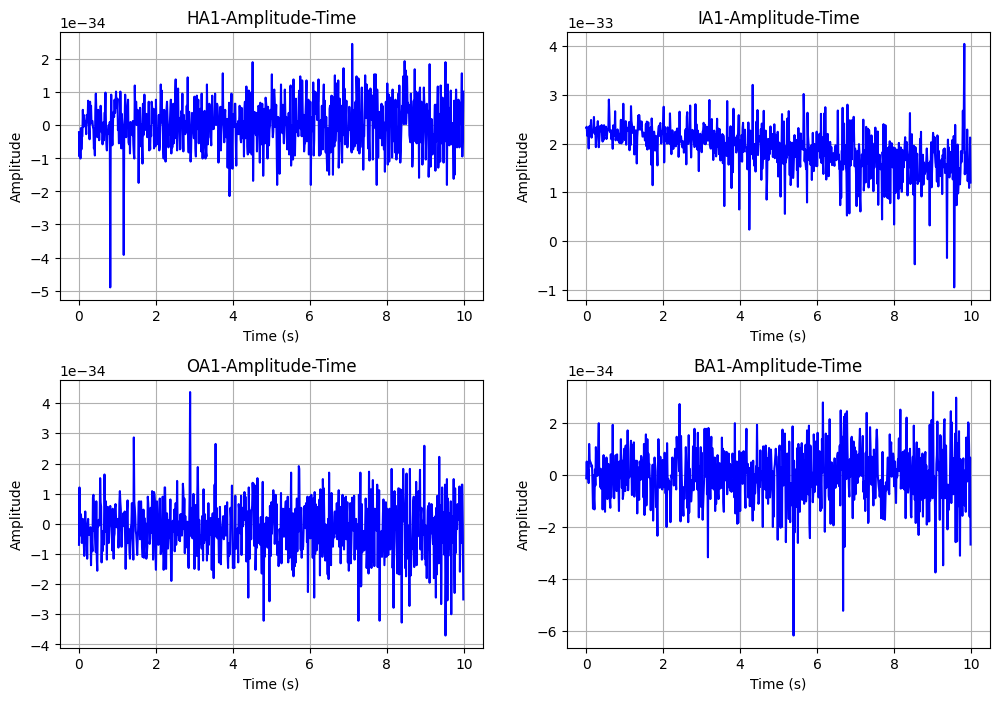

In [15]:
# 数据预处理，进行滤波，这里使用高通滤波
filt_ch=filter(ch,Wn=0.00001,btype='low')
draw_four_pic(filt_ch)


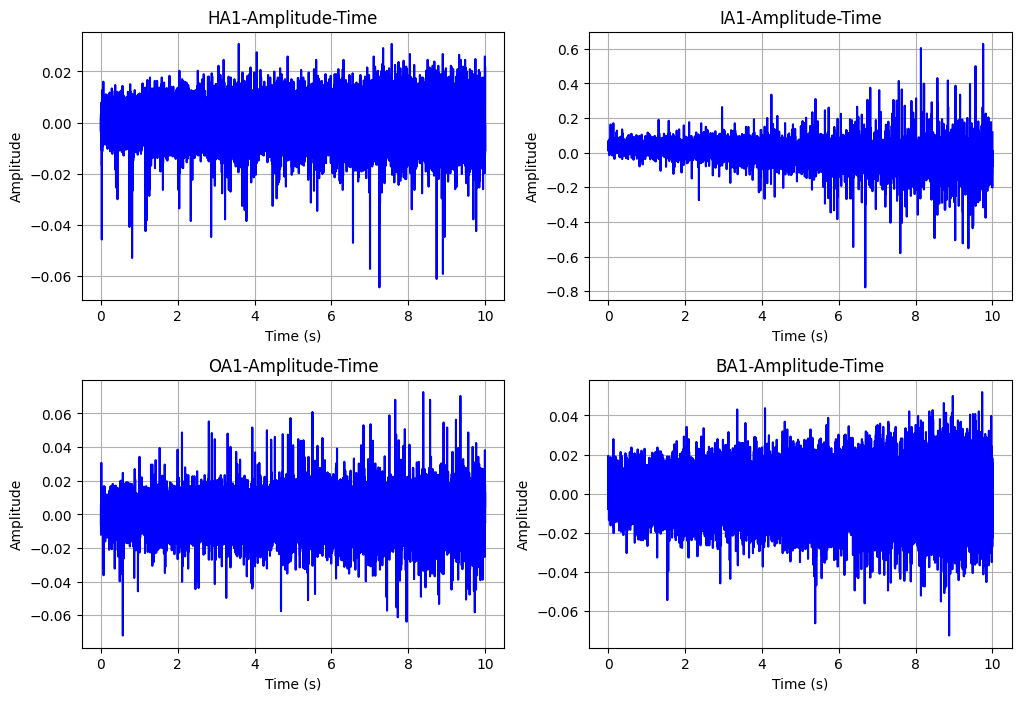

In [6]:
# 去均值
mean_ch=del_mean(ch)
draw_four_pic(mean_ch)


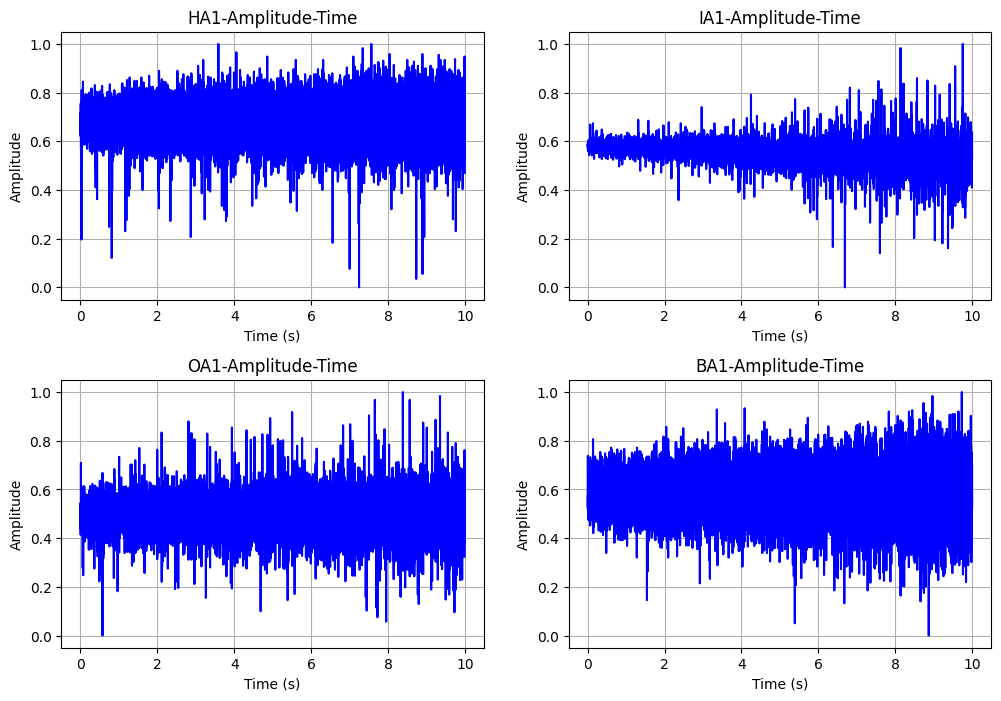

In [7]:
# 归一化
norm_ch=norm(ch)
draw_four_pic(norm_ch)


In [2]:
folder_path1=r'1-a healthy bearing'
folder_path2=r'2-a bearing with inner race fault'
folder_path3=r'3-a bearing with outer race fault'
folder_path4=r'4-a bearing with ball fault'
folder_path=[folder_path1,folder_path2,folder_path3,folder_path4]

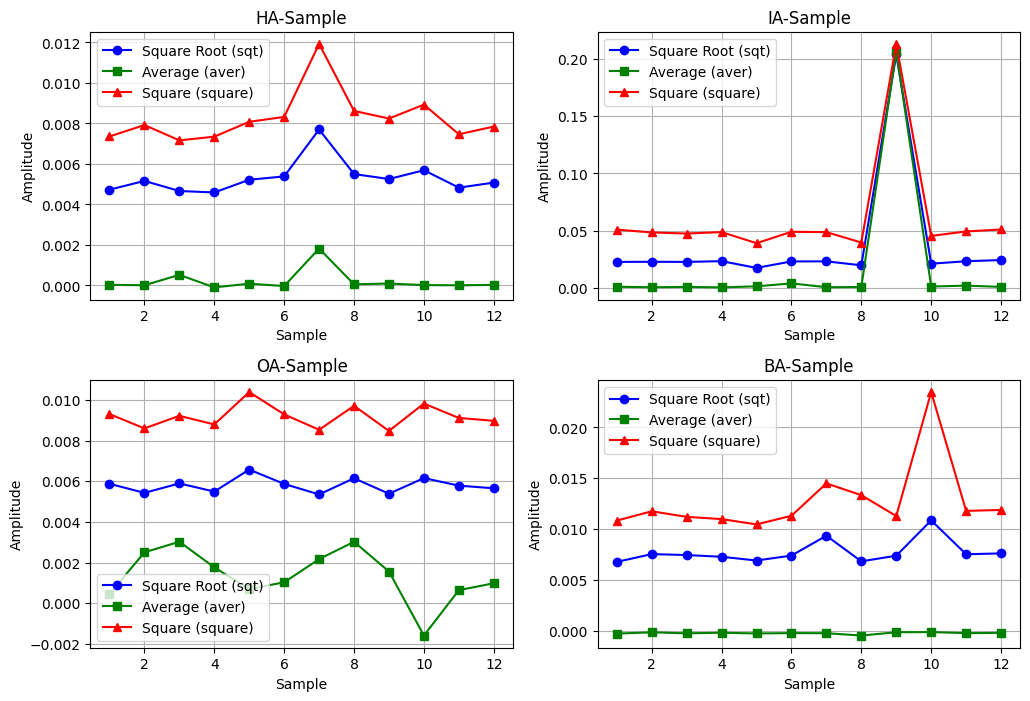

In [3]:
# 无虑波原始信号
sqr,ave,squ=cal_none(folder_path=folder_path)
draw_none_4(sqr,ave,squ)

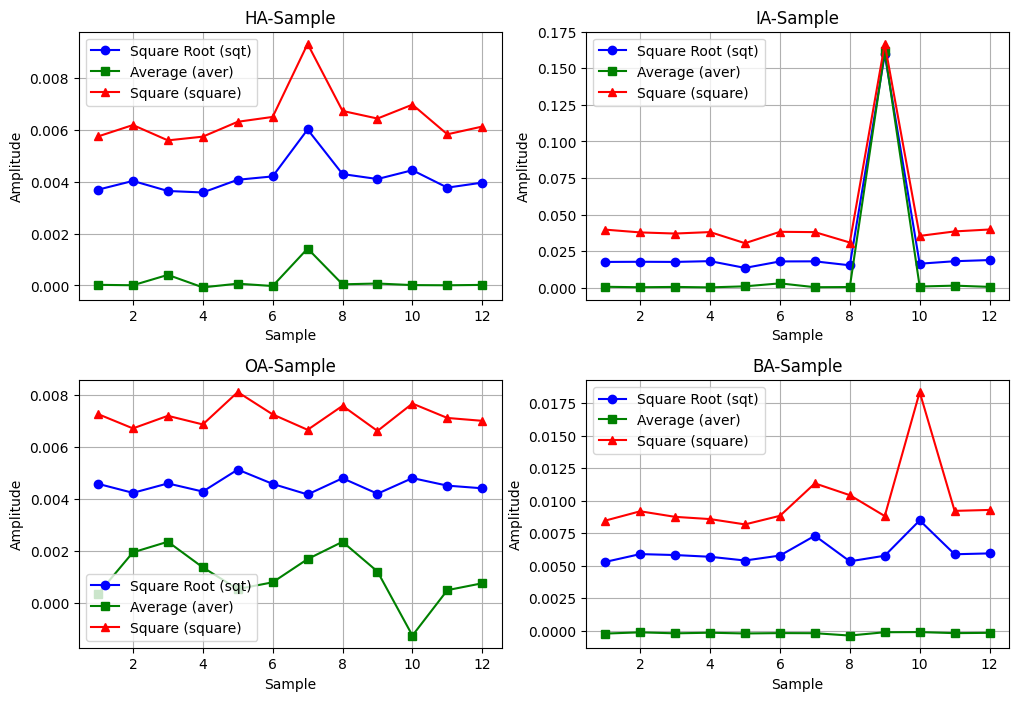

In [3]:
# 滤波以后
sqr,ave,squ=cal_none(folder_path=folder_path,slove='filter')
draw_none_4(sqr,ave,squ)


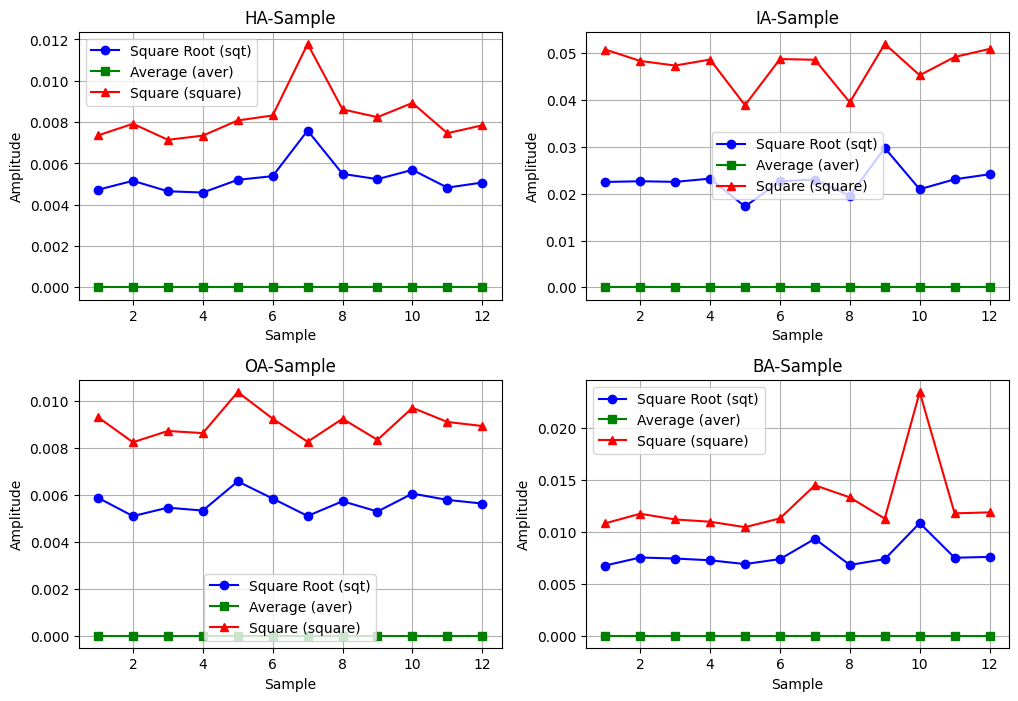

In [4]:
# 去均值话
sqr,ave,squ=cal_none(folder_path=folder_path,slove='mean')
draw_none_4(sqr,ave,squ)


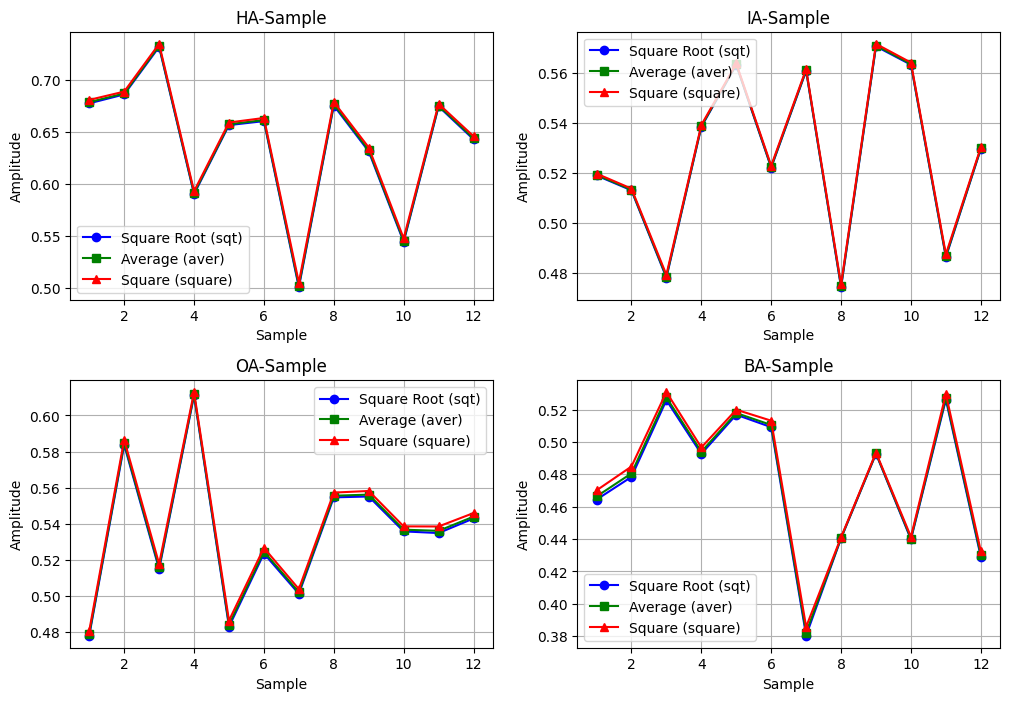

In [5]:
# 归一化
sqr,ave,squ=cal_none(folder_path=folder_path,slove='norm')
draw_none_4(sqr,ave,squ)

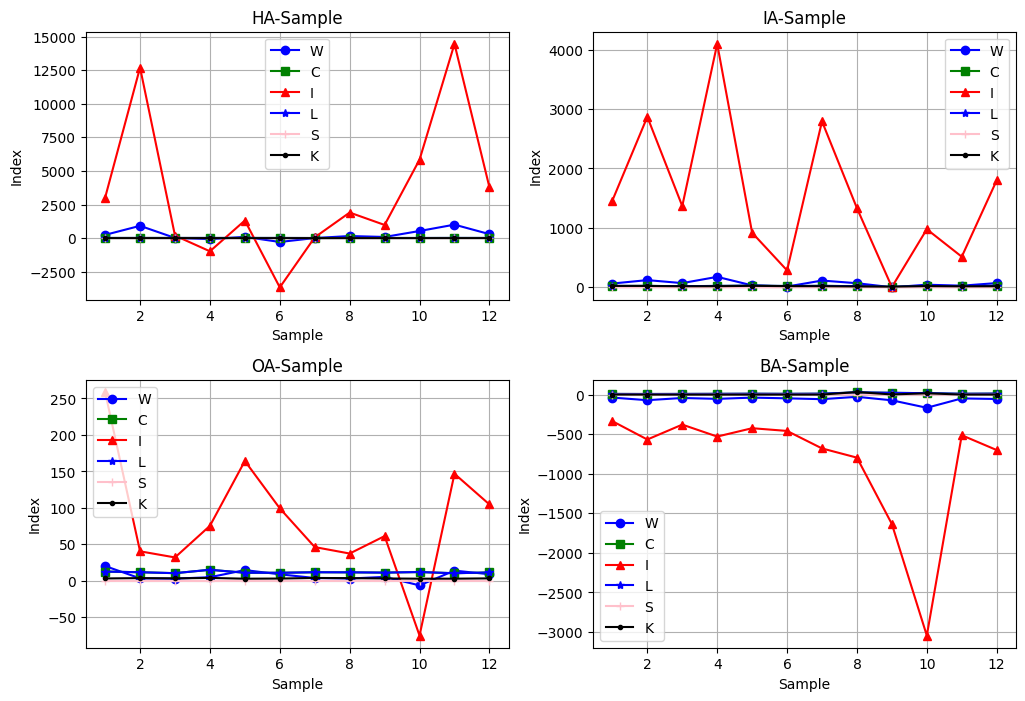

In [3]:
index=cal_have(folder_path=folder_path)
draw_have_6(index)

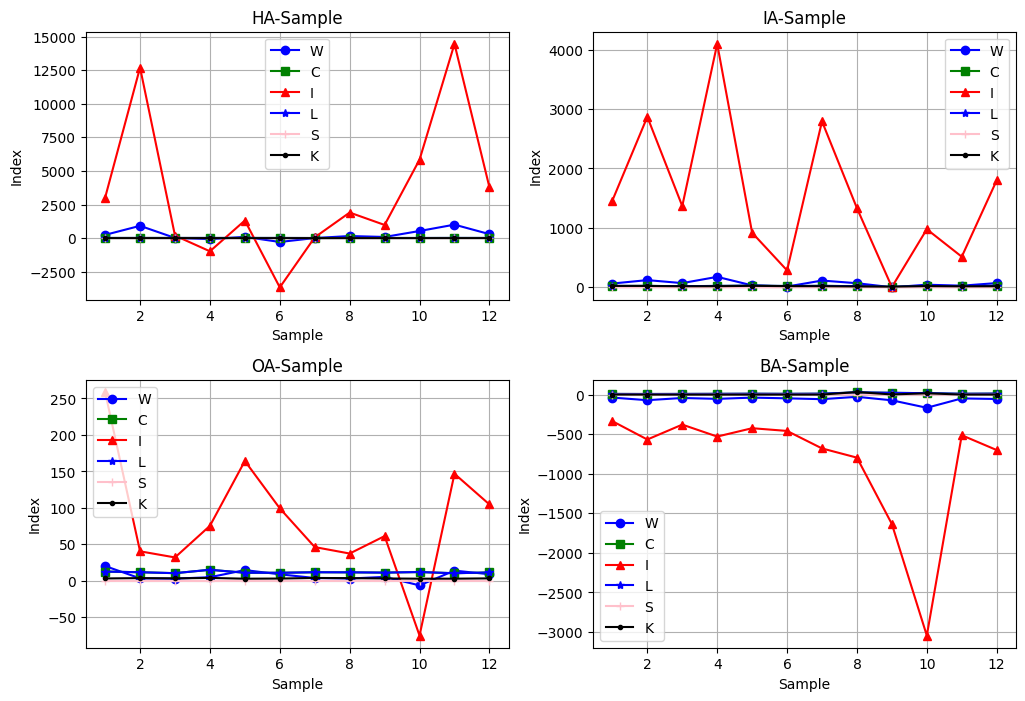

In [4]:
# 滤波
filt_index=cal_have(folder_path,slove='filter')
draw_have_6(filt_index)

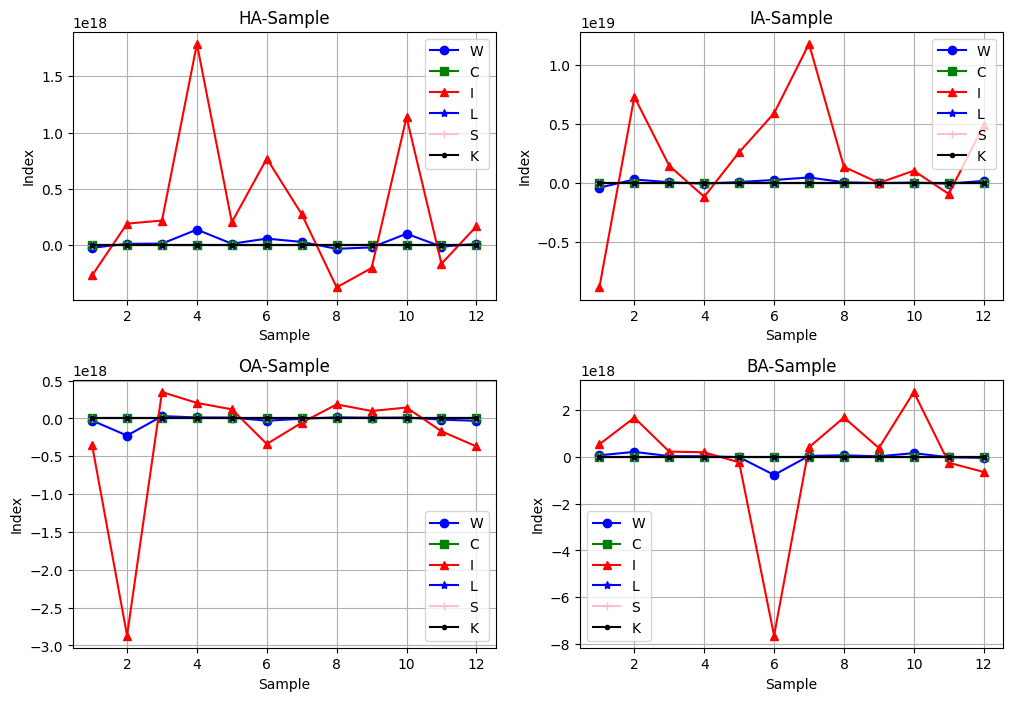

In [5]:
# 去均值化
mean_index=cal_have(folder_path,slove='mean')
draw_have_6(mean_index)

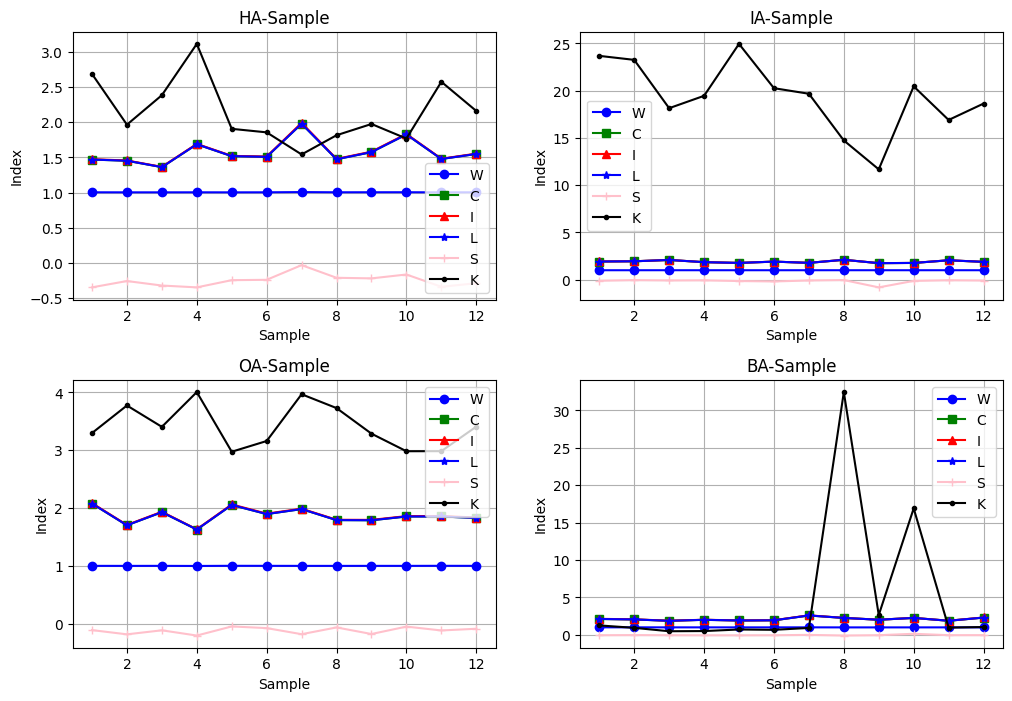

In [6]:
# 归一化
norm_index=cal_have(folder_path,slove='norm')
draw_have_6(norm_index)

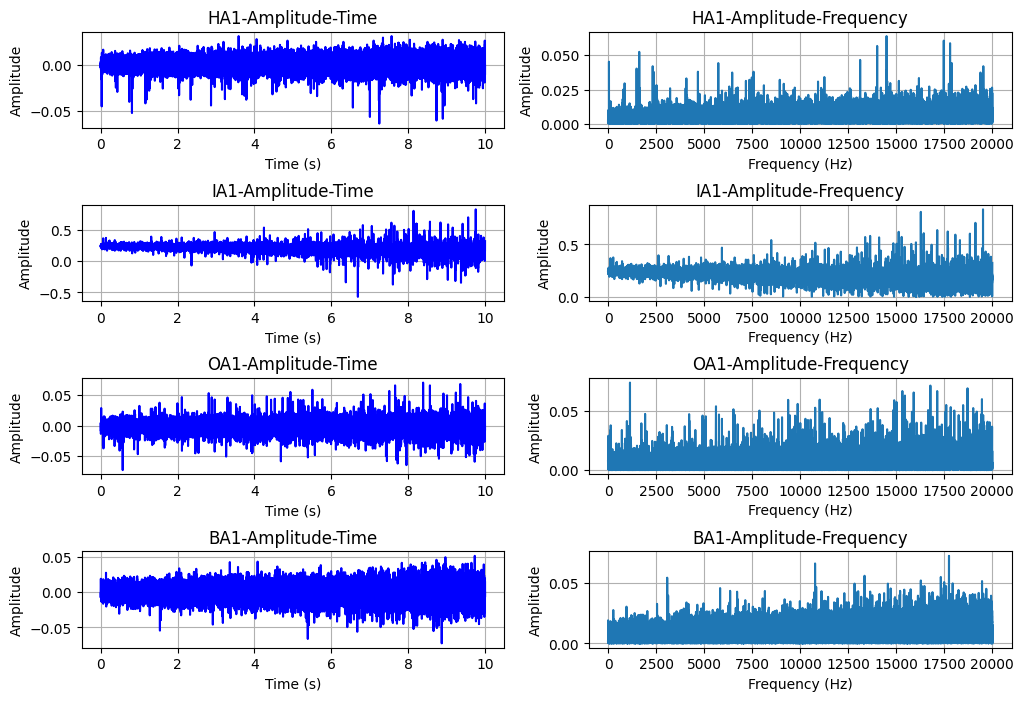

In [17]:
# 进行傅里叶变换
fft_ch=DWT(ch)
draw_8(ch,fft_ch)

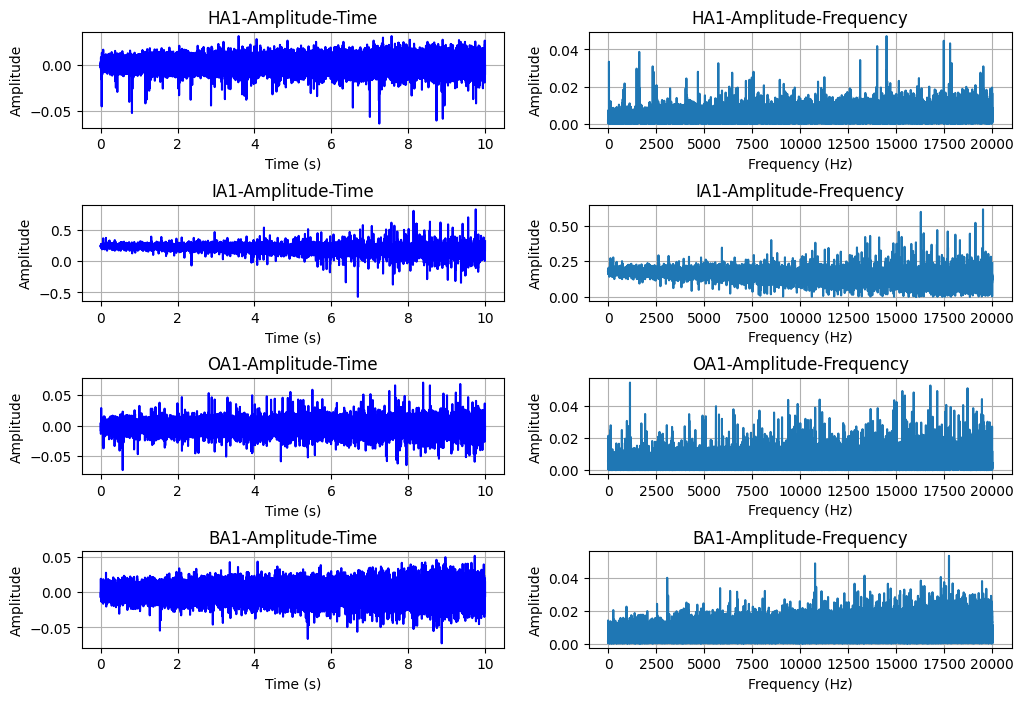

In [18]:
# 滤波-进行傅里叶变换
fft_ch=DWT(filter(ch))
draw_8(ch,fft_ch)

10001 10001
10001 10001
10001 10001
10001 10001


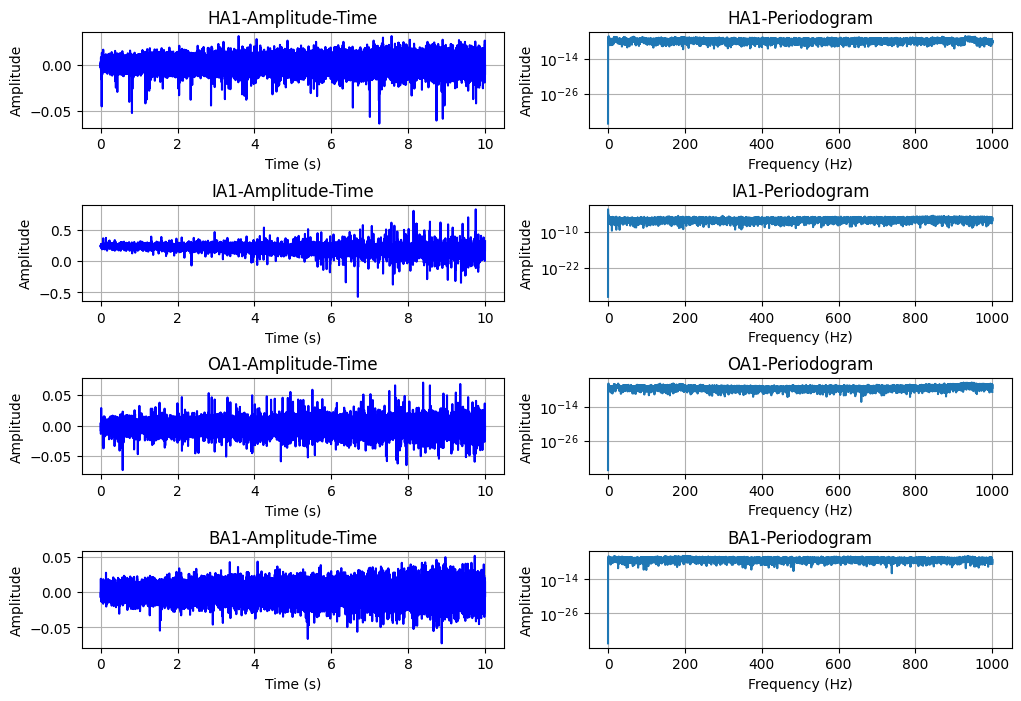

In [4]:
p_ch,fre=period(ch)
draw_8(ch,p_ch,fre=fre,title='Periodogram',btype='periodogram')


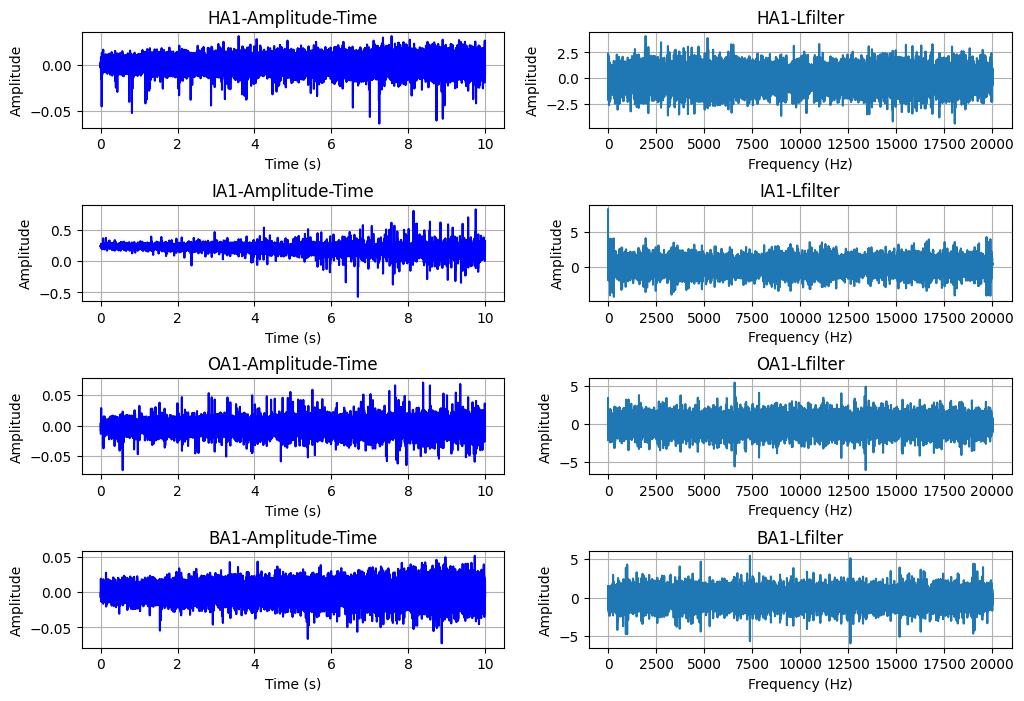

In [6]:
l_ch=llfilter(ch)
draw_8(ch,l_ch,title='Lfilter',btype='lfilter')

In [ ]:
# 时频域分析
# 短时傅里叶变换
sd_ch,fre,Zxx=SDWT(ch)
draw_8(ch,sd_ch,fre=fre,Zxx=Zxx,btype='stft')